In [1]:
import os, sys
cur_dir = os.getcwd()
basename = os.path.basename(cur_dir)
for _ in range(5):
    if basename != 'OCLog':
        cur_dir = os.path.dirname(cur_dir)
        basename = os.path.basename(cur_dir)
        #print(cur_dir, basename)
    else:
        if cur_dir not in sys.path:
            sys.path.append(cur_dir)
            #print(sys.path)
import os
from openpyxl import Workbook
from openpyxl import load_workbook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tqdm import trange, tqdm, tnrange
from oclog.BGL.bglv1 import BGLog, get_embedding_layer
from oclog.openset.boundary_loss import euclidean_metric, BoundaryLoss
from oclog.openset.pretrainingV1 import LogLineEncoder, LogSeqEncoder, LogClassifier
# from oclog.openset.openset import OpenSet
from oclog.openset.opensetv11 import OpenSet
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
import sklearn.metrics as m
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.manifold import TSNE
tf.random.set_seed(1234)
np.random.seed(1234) 

In [5]:
oset = OpenSet()
train_data, val_data,  test_data, bglog  = oset.get_bgdata(bg_class_obj=BGLog, save_padded_num_sequences=False, 
                                                           load_from_pkl=True, ablation=5000,
                                                           debug=True,
                                                          designated_ukc_cls=5)

ablation set to : 5000
padded_num_seq_df loaded from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\BGL\data\bgl_ukc.pkl
trained tokenizer, tk, loaded from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\BGL\data\bgl_tk.pkl
train_0:, 4000, val_0:, 500, test_0:, 500, train_1:, 4000, val_1:, 500, test_1:, 500, 4049 data in class 2 not enough to split into train:4000 and validation:500, adding the entire data as temp  ukc bucket from where later actual ukc can be taken
902 data in class 3 not enough to split into train:4000 and validation:500, adding the entire data as temp  ukc bucket from where later actual ukc can be taken
628 data in class 4 not enough to split into train:4000 and validation:500, adding the entire data as temp  ukc bucket from where later actual ukc can be taken
class 5 is added as ukc
ukc_5:, 165
75 data in class 6 not enough to split into train:4000 and validation:500, adding the entire data as temp  ukc bucket from where later actual ukc can be taken
train: 0    4000
1    4000
Name: 

got all the dataset
unknown optimizer None. assigning default as adam with lr_rate=2.6
got all the dataset
got all the dataset
vocab_size: 50
got all the dataset
2022-05-04 18:06:40.600143
starting to create ptmodel automatically
staring pre trining
Epoch 1/10
250/250 [==============================] - ETA: 0s - loss: 0.0225 - accuracy: 0.9926 - precision: 0.9926 - recall: 0.9926
Epoch 1: val_accuracy improved from -inf to 1.00000, saving model to data\ptmodel_2022-05-04_18_06_40.600143\
INFO:tensorflow:Assets written to: data\ptmodel_2022-05-04_18_06_40.600143\assets
250/250 [==============================] - 26s 102ms/step - loss: 0.0225 - accuracy: 0.9926 - precision: 0.9926 - recall: 0.9926 - val_loss: 9.6303e-04 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000 - lr: 0.0010
Epoch 2/10
250/250 [==============================] - ETA: 0s - loss: 1.6132e-05 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000
Epoch 2: val_accuracy did not improve from 1.00000
250/

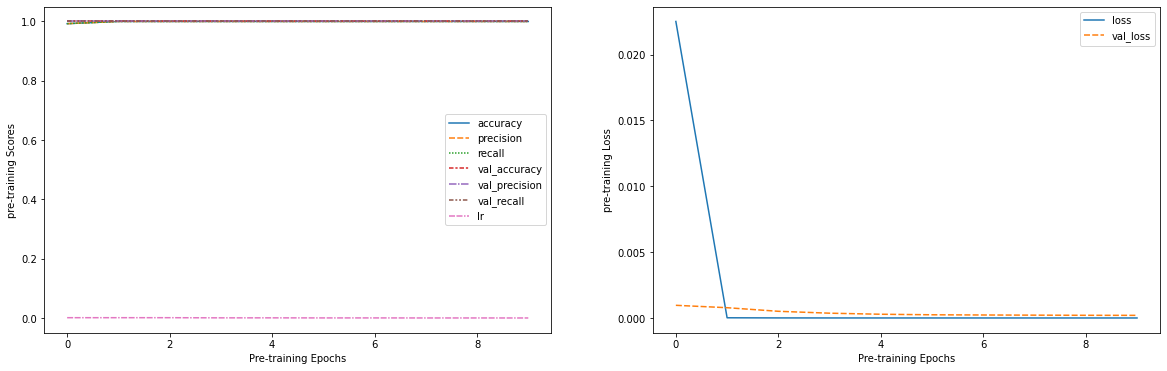

run_id:  2022-05-04_18_10_52.163419_6edd918ecba711ecb136ac8247733f47


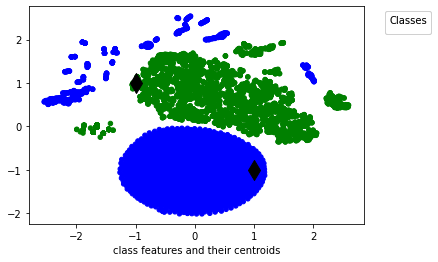

run_id:  2022-05-04_18_11_42.349582_8cc75e94cba711ec9a10ac8247733f47


100%|████████████████████████████████████████████████████████████████████████████████| 250/250 [00:33<00:00,  7.38it/s]


epoch: 1/9, train_loss: 4.899081707000732, F1_train: 0.4999374921865233 F1_val: 0.4979655054198772


100%|████████████████████████████████████████████████████████████████████████████████| 250/250 [00:34<00:00,  7.25it/s]


epoch: 2/9, train_loss: 4.899075984954834, F1_train: 0.44506104328523866 F1_val: 0.43674709823880487
train score not improving  going to wait state 1
val score not improving  going to wait state 1


100%|████████████████████████████████████████████████████████████████████████████████| 250/250 [00:34<00:00,  7.19it/s]


epoch: 3/9, train_loss: 4.899066925048828, F1_train: 0.9542229499249556 F1_val: 0.9969574036511156


100%|████████████████████████████████████████████████████████████████████████████████| 250/250 [00:34<00:00,  7.19it/s]


epoch: 4/9, train_loss: 4.899125576019287, F1_train: 0.9542229499249556 F1_val: 0.9969574780058651


100%|████████████████████████████████████████████████████████████████████████████████| 250/250 [00:34<00:00,  7.28it/s]


epoch: 5/9, train_loss: 4.899056911468506, F1_train: 0.9542974079126875 F1_val: 0.9974670977526991


100%|████████████████████████████████████████████████████████████████████████████████| 250/250 [00:34<00:00,  7.34it/s]


epoch: 6/9, train_loss: 4.899115562438965, F1_train: 0.9542974079126875 F1_val: 0.9969574780058651
train score not improving  going to wait state 1
val score not improving  going to wait state 1


100%|████████████████████████████████████████████████████████████████████████████████| 250/250 [00:34<00:00,  7.30it/s]


epoch: 7/9, train_loss: 4.899123191833496, F1_train: 0.9542974079126875 F1_val: 0.9969574036511156
train score not improving  going to wait state 2
val score not improving  going to wait state 2


100%|████████████████████████████████████████████████████████████████████████████████| 250/250 [00:34<00:00,  7.25it/s]


epoch: 8/9, train_loss: 4.89911413192749, F1_train: 0.9542974079126875 F1_val: 0.9969574409037483
train score not improving  going to wait state 3
val score not improving  going to wait state 3


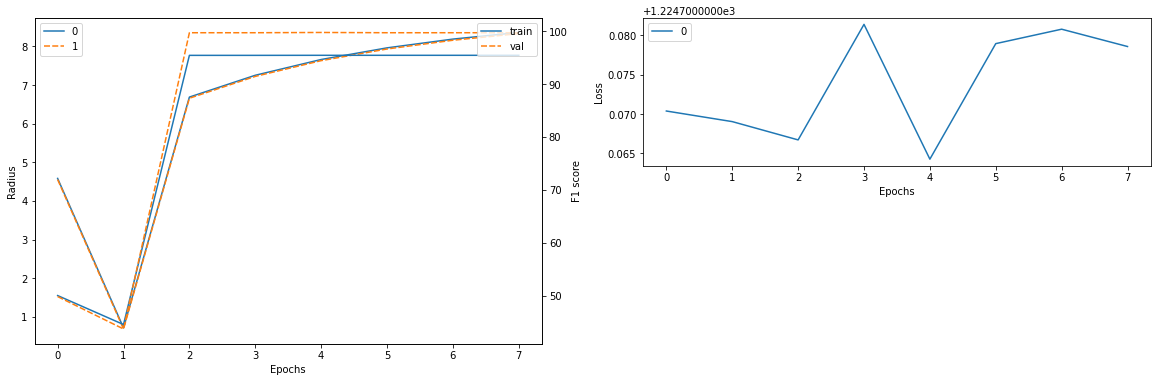

classification report for training:
[[4000    0    0]
 [   0 3330  670]
 [   0    0    0]]
91.62
f1_weighted: 0.9542974079126875, f1_macro: 0.6361982719417917, f1_micro: 0.91625, f_measure: {'Known': 95.4297, 'Open': 0, 'F1-score': 63.6198}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4000
           1       1.00      0.83      0.91      4000
           5       0.00      0.00      0.00         0

    accuracy                           0.92      8000
   macro avg       0.67      0.61      0.64      8000
weighted avg       1.00      0.92      0.95      8000

classification report for test data:
[[498   0   0]
 [  0 489   0]
 [  0   0 165]]
100.0
f1_weighted: 1.0, f1_macro: 1.0, f1_micro: 1.0, f_measure: {'Known': 100.0, 'Open': 100.0, 'F1-score': 100.0}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       498
           1       1.00      1.00      1.00       489
           5    

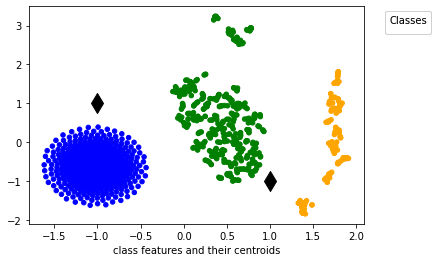

INFO:tensorflow:Assets written to: ram://ad782e04-61a7-49d8-a0ee-5d5edf80fc46/assets


In [6]:
res = oset.train(train_data=train_data, val_data=val_data,
                 test_data=test_data, bglog=bglog, 
                 manual_color_map=True, centroid_black=True,                               
                 tsne_n_iter=2000, tsne_perplexity=8,
                 embedding_size=16, oc_lr=2.6, pt_epochs=10, oc_epochs=9,)

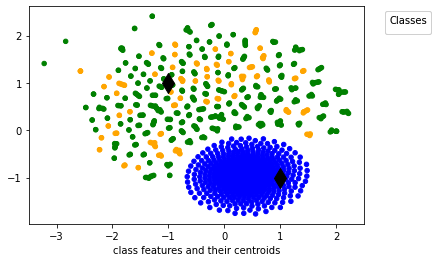

In [10]:
oset.plot_centroids(use_labels=oset.total_preds, tsne_perplexity=1,
                   manual_color_map=True, centroid_black=True,  )

perpexity : 13


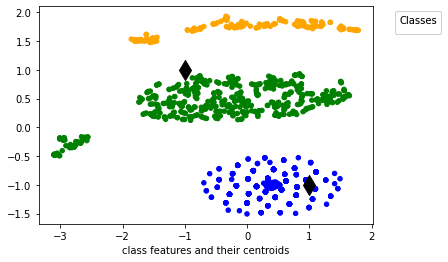

perpexity : 17


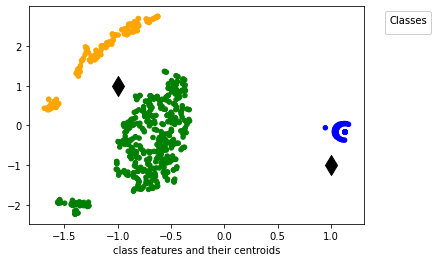

perpexity : 30


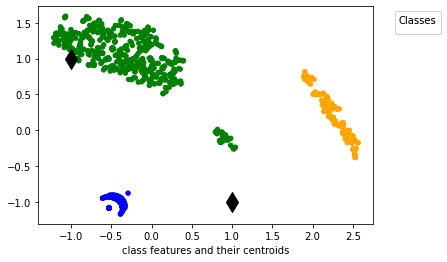

perpexity : 40


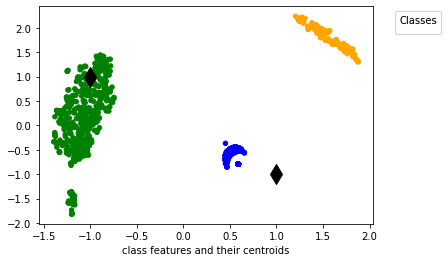

perpexity : 45


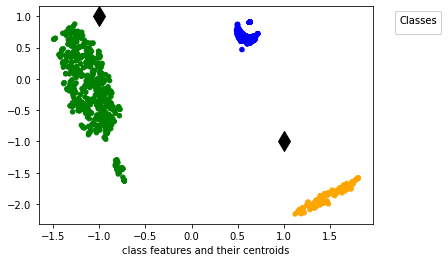

perpexity : 86


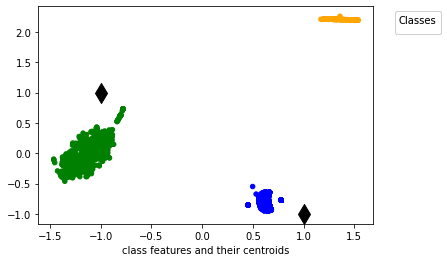

In [11]:
for i in (13, 17, 30, 40, 45, 86):
    print('perpexity :', i)    
    oset.plot_centroids(use_labels=oset.total_preds, centroid_black=True,
                        manual_color_map=True, tsne_perplexity=i)

In [12]:
oset.radius

<tf.Variable 'boundary_loss/Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[7.6590767],
       [7.6296587]], dtype=float32)>

ablation set to : 1500
padded_num_seq_df loaded from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\BGL\data\bgl_ukc.pkl
trained tokenizer, tk, loaded from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\BGL\data\bgl_tk.pkl
train_0:, 1200, val_0:, 150, test_0:, 150, train_1:, 1200, val_1:, 150, test_1:, 150, train_2:, 1200, val_2:, 150, test_2:, 150, 902 data in class 3 not enough to split into train:1200 and validation:150, adding the entire data as temp  ukc bucket from where later actual ukc can be taken
628 data in class 4 not enough to split into train:1200 and validation:150, adding the entire data as temp  ukc bucket from where later actual ukc can be taken
class 5 is added as ukc
ukc_5:, 150
75 data in class 6 not enough to split into train:1200 and validation:150, adding the entire data as temp  ukc bucket from where later actual ukc can be taken
train: 0    1200
1    1200
2    1200
Name: label, dtype: int64
val: 0    150
1    150
2    150
Name: label, dtype: int64
test: 0    150
1    150
2    1

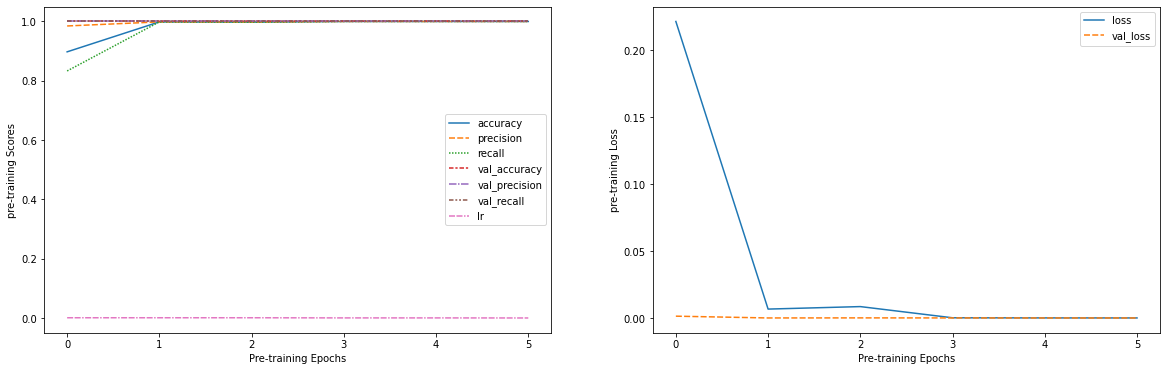

run_id:  2022-05-04_21_35_59.517567_169ec6fdcbc411ec8594ac8247733f47
the color map for the classes, here index postion are the class number: ['green' 'blue' 'yellow' 'red']


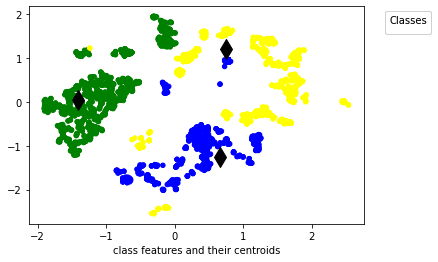

run_id:  2022-05-04_21_36_19.292941_22684289cbc411ecb136ac8247733f47


100%|████████████████████████████████████████████████████████████████████████████████| 112/112 [00:15<00:00,  7.35it/s]


epoch: 1/10, train_loss: 7.273138523101807, F1_train: 0.42267318209994065 F1_val: 0.3761091393078971


100%|████████████████████████████████████████████████████████████████████████████████| 112/112 [00:15<00:00,  7.37it/s]


epoch: 2/10, train_loss: 7.279648303985596, F1_train: 0.4846134103123803 F1_val: 0.40651732249786143


100%|████████████████████████████████████████████████████████████████████████████████| 112/112 [00:15<00:00,  7.39it/s]


epoch: 3/10, train_loss: 7.268989562988281, F1_train: 0.5244621498219525 F1_val: 0.42039995822890563


100%|████████████████████████████████████████████████████████████████████████████████| 112/112 [00:15<00:00,  7.40it/s]


epoch: 4/10, train_loss: 7.256278991699219, F1_train: 0.5464607812066343 F1_val: 0.4369703389830509


100%|████████████████████████████████████████████████████████████████████████████████| 112/112 [00:15<00:00,  7.39it/s]


epoch: 5/10, train_loss: 7.285012245178223, F1_train: 0.5581582637899959 F1_val: 0.43473819612590797


100%|████████████████████████████████████████████████████████████████████████████████| 112/112 [00:15<00:00,  7.42it/s]


epoch: 6/10, train_loss: 7.277941703796387, F1_train: 0.6539882874300168 F1_val: 0.6534598214285714


100%|████████████████████████████████████████████████████████████████████████████████| 112/112 [00:15<00:00,  7.38it/s]


epoch: 7/10, train_loss: 7.275320529937744, F1_train: 0.6570923425044312 F1_val: 0.6534598214285714


100%|████████████████████████████████████████████████████████████████████████████████| 112/112 [00:15<00:00,  7.42it/s]


epoch: 8/10, train_loss: 7.278454303741455, F1_train: 0.6587394109511477 F1_val: 0.653455919080919


100%|████████████████████████████████████████████████████████████████████████████████| 112/112 [00:15<00:00,  7.35it/s]


epoch: 9/10, train_loss: 7.280642032623291, F1_train: 0.660508171147004 F1_val: 0.6512198189134809


100%|████████████████████████████████████████████████████████████████████████████████| 112/112 [00:15<00:00,  7.40it/s]


epoch: 10/10, train_loss: 7.271785259246826, F1_train: 0.663077238971659 F1_val: 0.6546633897461424


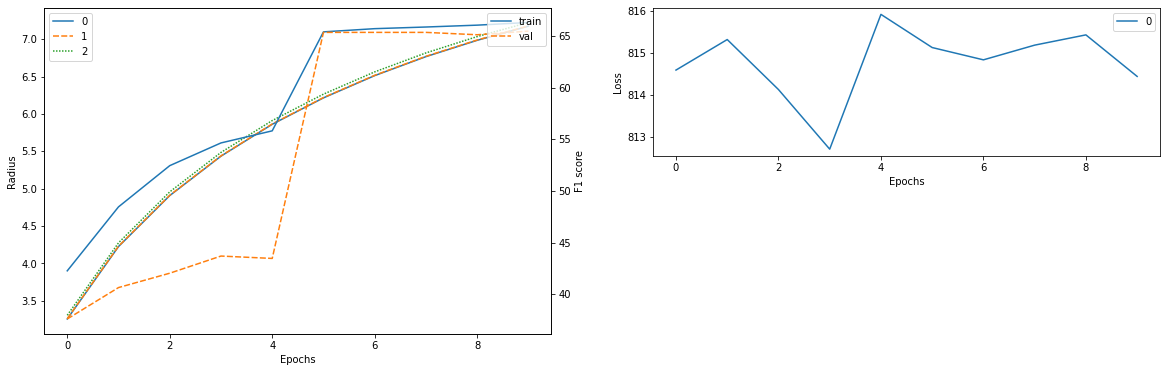

classification report for training:
[[1195    0    0    1]
 [   0   16    0 1176]
 [   0    0 1107   89]
 [   0    0    0    0]]
64.68
f1_weighted: 0.6631853338185244, f1_macro: 0.4968566464612233, f1_micro: 0.6467633928571429, f_measure: {'Known': 66.2476, 'Open': 0, 'F1-score': 49.6857}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1196
           1       1.00      0.01      0.03      1192
           2       1.00      0.93      0.96      1196
           5       0.00      0.00      0.00         0

    accuracy                           0.65      3584
   macro avg       0.75      0.48      0.50      3584
weighted avg       1.00      0.65      0.66      3584

classification report for test data:
[[142   0   0   0]
 [  0   0   0 147]
 [  0   0 111  33]
 [  1   0   0 142]]
68.58
f1_weighted: 0.6149376643696527, f1_macro: 0.619458037884084, f1_micro: 0.6857638888888888, f_measure: {'Known': 62.236, 'Open': 61.0753, 'F1-score': 61.94

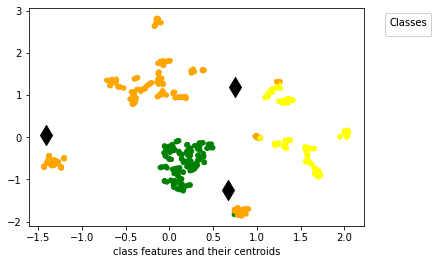

INFO:tensorflow:Assets written to: ram://8de8fbdf-7ae1-4b51-a478-24390c959a4b/assets


In [2]:
oset = OpenSet()
train_data, val_data,  test_data, bglog  = oset.get_bgdata(bg_class_obj=BGLog, save_padded_num_sequences=False, 
                                                           load_from_pkl=True, ablation=1500,
                                                           debug=True,
                                                          designated_ukc_cls=5)
res = oset.train(train_data=train_data, val_data=val_data,
                 test_data=test_data, bglog=bglog, 
                 manual_color_map=True, centroid_black=True,                               
                 tsne_n_iter=2000, tsne_perplexity=8,
                 embedding_size=12, oc_lr=2.5, pt_epochs=6, oc_epochs=10,)

perpexity : 13
the color map for the classes, here index postion are the class number: ['green' 'blue' 'yellow' 'red']


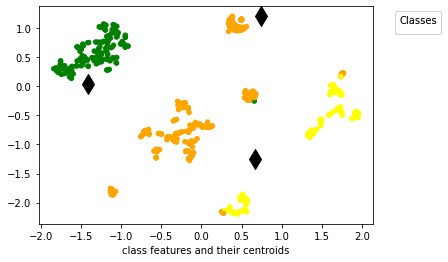

perpexity : 17
the color map for the classes, here index postion are the class number: ['green' 'blue' 'yellow' 'red']


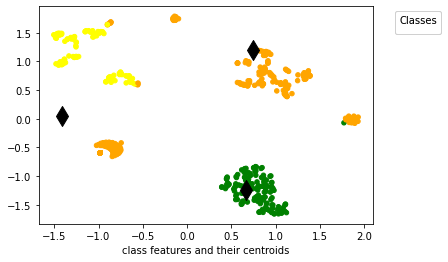

perpexity : 30
the color map for the classes, here index postion are the class number: ['green' 'blue' 'yellow' 'red']


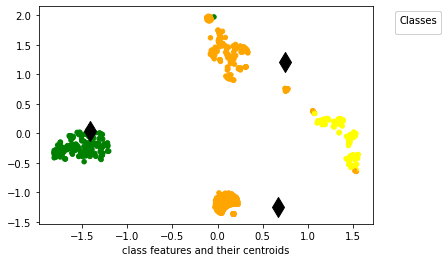

perpexity : 40
the color map for the classes, here index postion are the class number: ['green' 'blue' 'yellow' 'red']


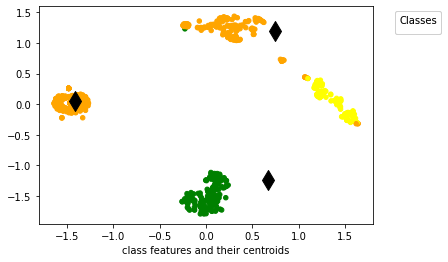

perpexity : 45
the color map for the classes, here index postion are the class number: ['green' 'blue' 'yellow' 'red']


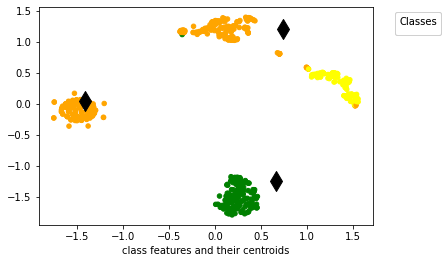

perpexity : 86
the color map for the classes, here index postion are the class number: ['green' 'blue' 'yellow' 'red']


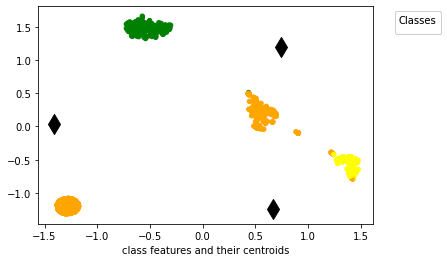

In [3]:
for i in (13, 17, 30, 40, 45, 86):
    print('perpexity :', i)    
    oset.plot_centroids(use_labels=oset.total_preds, centroid_black=True,
                        manual_color_map=True, tsne_perplexity=i)

In [4]:
oset.radius

<tf.Variable 'boundary_loss/Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[7.173638 ],
       [7.1776214],
       [7.223321 ]], dtype=float32)>